In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.set_random_seed(42)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


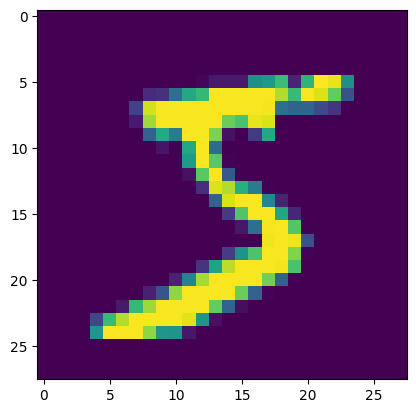

Label: 5


In [3]:
import matplotlib.pyplot as plt
#plt.imshow(x_train[0], cmap = 'gray')
plt.imshow(x_train[0])
plt.show()
print(f'Label: {y_train[0]}')

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
def plot_performance(history):
    flg, ax = plt.subplots(1,2)
    flg.tight_layout()
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss')
    ax[0].plot(train_loss, label='Training Loss')
    ax[0].plot(val_loss, label='Validation Loss')
    ax[0].legend()
    
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].plot(train_acc, label='Training Accuracy')
    ax[1].plot(val_acc, label='Validation Accuracy')
    ax[1].legend()

    plt.show()

## Basic model

This model represents a basic neural network that we covered during the lab session. It consists of a single pooling layer (MaxPooling) with dimensions that drastically reduce the input image (28x28) to a single unit, followed by a flattening layer to convert the output into a vector. Finally, a fully connected (Dense) layer with a 'softmax' activation function for classification. This model is simple, but serves as a useful starting point.

In [7]:
input_shape = (28,28,1)

model_smallest = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.MaxPooling2D(pool_size=(28,28)),
        #layers.AveragePooling2D(pool_size=(28,28)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_smallest.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 1, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

The model shown includes a **pooling layer** that reduces the spatial dimensions of the input using a 28x28 pooling window. Then, a **flattening layer** converts the output of the previous layer into a one-dimensional vector. Finally, an output layer provides the final classification. 

In [8]:
batch_size = 128
epochs = 15

model_smallest.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_smallest = model_smallest.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0974 - loss: 2.3543 - val_accuracy: 0.0975 - val_loss: 2.3085
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1154 - loss: 2.3036 - val_accuracy: 0.1060 - val_loss: 2.3023
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1159 - loss: 2.3009 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1160 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.

The model has a total of 20 parameters, all of which are trainable, and there are no non-trainable parameters. Trainable parameters are associated with the Dense layer.

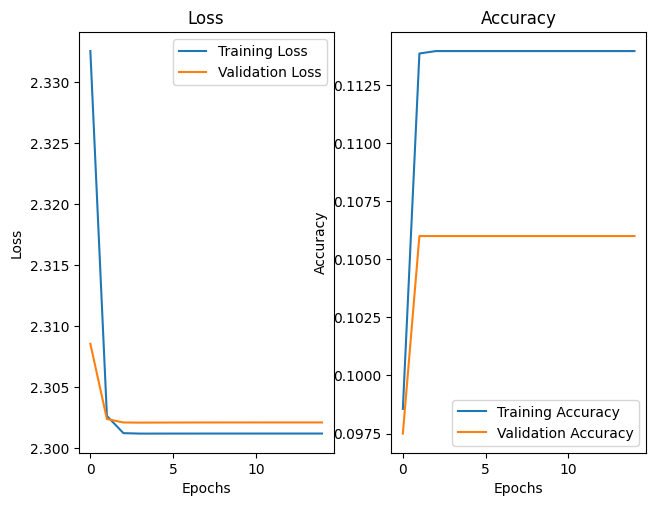

In [9]:
plot_performance(history_smallest)

In the **Loss** graph, there is an initial rapid decline, indicating a significant reduction in error during the early epochs of training. However, this decrease quickly plateaus, stabilizing at a high value (around 2.30) for both the training and validation data. This behavior suggests that the model fails to further improve its performance after the initial phase.

In the **Accuracy** graph, a similar trend can be observed. Accuracy increases rapidly during the first epochs but soon plateaus at an extremely low value (around 0.106) for both training and validation. This indicates that the model is not learning effectively.

In [10]:
score = model_smallest.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 2.301194906234741
Test accuracy 0.11349999904632568


As shown in the graphs, the model exhibits unsatisfactory performance in both loss and accuracy on the data. The Test Loss value of 2.30 is very high, reflecting significant errors in predictions on the test data. A Test Accuracy of 0.11 highlights that the model is not effectively learning from the data.

## Model 1 - Added a convolutional layer

The first modification made to the base model's network structure involves adding a convolutional layer with 8 **filters**, each of size 5x5, using the **ReLU** activation function. In this configuration, the spatial dimensions of the model divide perfectly by the kernel and pool size, ensuring an optimal reduction in size without significant loss of information.

In [11]:
input_shape = (28,28,1)

model_1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Conv2D(8, kernel_size=(5,5), activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,338 (20.85 KB)

 Trainable params: 5,338 (20.85 KB)

 Non-trainable params: 0 (0.00 B)

The model's structure begins with a convolutional layer, producing an output with spatial dimensions of **24x24**, calculated based on the **5x5** kernel size. The convolution applies **8 filters**, resulting in **208 trainable parameters** associated with this layer.

Next, the **MaxPooling2D** layer reduces the spatial dimensions to **8x8**, while keeping the number of filters unchanged. This pooling layer does not contain any trainable parameters.

The **Flatten** layer then transforms the **8x8x8** matrix into a one-dimensional vector with **512 elements**, and, similarly, it does not have any trainable parameters.

Finally, the model includes a fully connected (**Dense**) layer, which outputs **10 neurons**. The number of parameters in this layer (**5130**) is derived from the product of the number of neurons in the previous layer (**512**) and the number of neurons in this layer (**10**), plus the biases.

In total, the model has **5338 parameters**, all of which are trainable. There are no non-trainable parameters.

In [12]:
batch_size = 128
epochs = 15

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7090 - loss: 1.0966 - val_accuracy: 0.9242 - val_loss: 0.2654
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9252 - loss: 0.2601 - val_accuracy: 0.9443 - val_loss: 0.1920
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9452 - loss: 0.1892 - val_accuracy: 0.9567 - val_loss: 0.1518
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9563 - loss: 0.1499 - val_accuracy: 0.9640 - val_loss: 0.1265
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9629 - loss: 0.1246 - val_accuracy: 0.9693 - val_loss: 0.1101
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9680 - loss: 0.1073 - val_accuracy: 0.9733 - val_loss: 0.0987
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9713 - loss: 0.0946 - val_accuracy: 0.9755 - val_loss: 0.0906
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9745 - loss: 0.0848 - val_accur

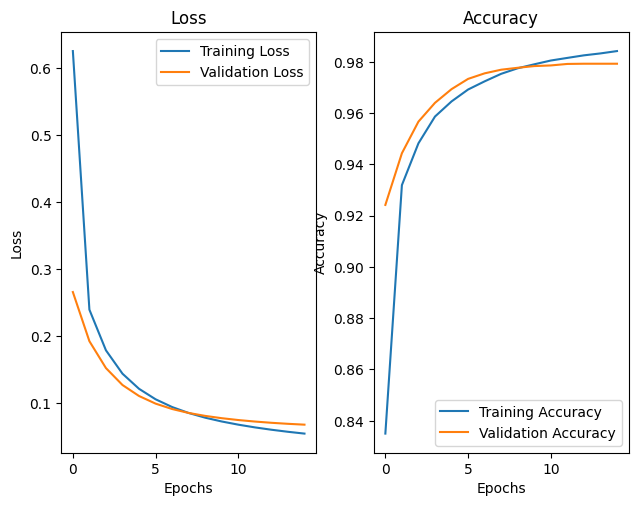

In [13]:
plot_performance(history1)

From the Loss graph, it is evident that both the training and validation loss decrease rapidly during the initial epochs, indicating that the model is effectively learning from the training data and performing well on the validation data. Both curves stabilize around **0.1**, a low value that reflects accurate predictions by the model. However, a slight overfitting trend can be observed after approximately 15 epochs.

The Accuracy graph shows a steep increase in accuracy during the early epochs, eventually stabilizing at around **0.98** for the training accuracy, demonstrating that the model is fitting the training data effectively. The validation accuracy, while slightly lower than the training accuracy, stabilizes at approximately **0.97**. Similar to the loss graph, there is a minor overfitting pattern visible around 15 epochs.

In conclusion, these graphs highlight good performance for the model with a convolutional layer, despite the slight overfitting observed in later epochs.

In [14]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.056756701320409775
Test accuracy 0.982200026512146


The results obtained from the model demonstrate excellent performance on the test data, as evidenced by a **test loss** of 0.05 and a **test accuracy** of 0.98. 

A very low test loss, such as 0.05 in this case, indicates that the model makes minimal errors when making predictions on the test dataset. Similarly, a test accuracy of 0.98 signifies that the model is capable of correctly classifying nearly all samples in the test dataset.

These satisfactory results were anticipated based on the earlier analysis of the training and validation graphs. The absence of underfitting and only a slight overfitting ensured that the model maintained strong performance during testing, avoiding any significant degradation in accuracy or increase in loss.

## Model 2 - Added a second convolutional layer

In this second model, the structure of Model 1 was modified with the aim of improving its performance while adhering to the constraint of 7000 parameters. Specifically, a second convolutional layer was added, followed by a pooling operation. The first convolutional layer was configured with 12 filters and a kernel size of 5x5, while the second convolutional layer used 23 filters with a kernel size of 4x4. The activation function "ReLU" was adopted for both convolutional layers. 

In [15]:
input_shape = (28,28,1)

model_2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Conv2D(12, kernel_size=(5,5), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(23, kernel_size=(4,4), activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 12)     │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 23)       │         4,439 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 23)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 207)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,831 (26.68 KB)

 Trainable params: 6,831 (26.68 KB)

 Non-trainable params: 0 (0.00 B)

The **first convolutional layer** uses 12 filters with a kernel size of 5×5, reducing the spatial dimensions of the input from 28×28 to 24×24. Subsequently, a max-pooling layer with a kernel size of 2×2 further reduces the spatial dimensions to 12×12 while keeping the number of channels unchanged. This pooling layer does not introduce any trainable parameters and solely contributes to dimensionality reduction.

The **second convolutional layer** employs 23 filters with a kernel size of 4×4, producing an output with spatial dimensions of 9×9 and 23 channels, resulting in a total of 4439 trainable parameters. Following this, a second max-pooling layer with a kernel size of 3×3 reduces the spatial dimensions to 3×3, again maintaining the number of channels and introducing no additional trainable parameters.

The resulting output is then transformed into a one-dimensional vector of 207 elements through a flattening layer, which does not introduce any trainable parameters. Finally, the fully connected layer takes the 207-element vector as input and maps it to 10 neurons, corresponding to the number of classes in the problem, adding 2080 trainable parameters to the model.

In total, the model comprises 6831 trainable parameters and no non-trainable parameters.

In [16]:
batch_size = 128
epochs = 15

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7218 - loss: 1.0067 - val_accuracy: 0.9647 - val_loss: 0.1228
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9611 - loss: 0.1260 - val_accuracy: 0.9717 - val_loss: 0.0915
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9724 - loss: 0.0905 - val_accuracy: 0.9754 - val_loss: 0.0787
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9771 - loss: 0.0741 - val_accuracy: 0.9789 - val_loss: 0.0702
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9797 - loss: 0.0641 - val_accuracy: 0.9813 - val_loss: 0.0630
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9822 - loss: 0.0561 - val_accuracy: 0.9837 - val_loss: 0.0573
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9840 - loss: 0.0497 - val_accuracy: 0.9840 - val_loss: 0.0539
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9856 - loss: 0.0445 - val_accu

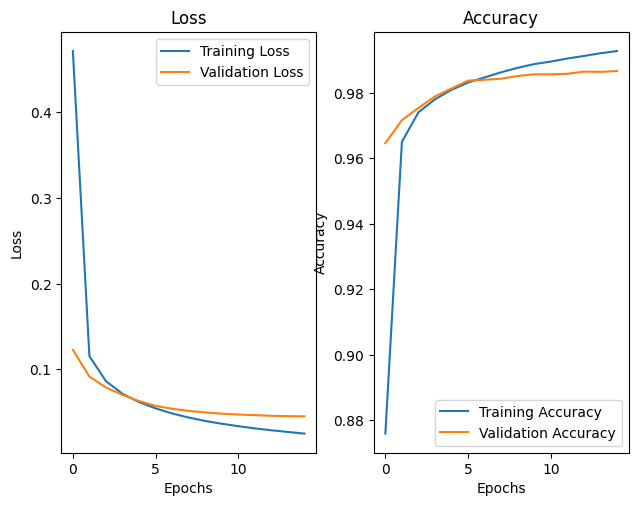

In [17]:
plot_performance(history2)

From the **loss graph**, it can be observed that both curves decrease progressively. The *Training Loss* stabilizes around a value of 0.08, while the *Validation Loss* continues to decrease, approaching 0. Compared to the loss graph of Model 1, there is a noticeable increase in the overfitting that was present around the 15th epoch.

Similarly, the **accuracy graph** also shows an increase in overfitting compared to Model 1. Specifically, the *Validation Accuracy* stabilizes around 0.98, while the *Training Accuracy* rises rapidly during the initial epochs, surpassing 0.98 after just a few iterations and approaching 100% toward the end of the training.

In [18]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.03473421558737755
Test accuracy 0.9894999861717224


The value of the *Test Loss* (0.03) is extremely low, indicating that the error made by the model on the test data is minimal. Similarly, the *Test Accuracy* (0.98) is very high, demonstrating that the model can correctly classify almost all the samples in the test dataset.

These results are consistent with what was observed in the graphs. The stabilization of the *Validation Loss* and *Validation Accuracy* curves suggests that the model is well-trained and balanced. Comparing the results of this model with those of Model 1, it is evident that the second model achieved better *Test Loss* and *Test Accuracy* values. However, the graphs reveal a greater tendency toward overfitting in the model with two convolutional layers.

This difference can likely be attributed to the second model's increased capacity to learn complex features from the data. While this capability improves performance, it also results in a higher susceptibility to overfitting.

## Model 3 - Added the third convolutional layer

In this configuration, a third convolutional layer was added to the architecture of Model 2. Additionally, the number of filters was modified, setting 8 filters with a 3x3 kernel for the first convolutional layer, while the second and third convolutional layers each use 16 filters with a 2x2 kernel. For all convolutional layers, the "relu" activation function was used.

In [23]:
input_shape = (28,28,1)

model_3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Conv2D(8, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(16, kernel_size=(2,2), activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3)),
        layers.Conv2D(16, kernel_size=(2,2), activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 16)       │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,818 (7.10 KB)

 Trainable params: 1,818 (7.10 KB)

 Non-trainable params: 0 (0.00 B)

The **first convolutional layer** uses 8 filters of size 2x2, reducing the spatial dimensions of the input from 28x28 to 26x26. The first pooling layer, applied with a 2x2 kernel, further reduces the spatial dimension to 13x13, while keeping the number of channels unchanged and without introducing trainable parameters. 

The **second convolutional layer** then uses 16 filters of size 2x2, transforming the output into a spatial dimension of 12x12 with 16 channels, for a total of 528 parameters. This is followed by a second pooling layer with a 3x3 kernel, which further reduces the spatial dimensions to 4x4, while maintaining the number of channels. 

Finally, the **third convolutional layer** employs 16 filters of size 2x2, transforming the output into a spatial dimension of 3x3 with 16 channels, for a total of 1040 parameters. This layer is followed by a third pooling layer with a 3x3 kernel, which reduces the spatial dimensions to 1x1.

The output is then transformed into a one-dimensional vector of 16 elements through a flattening layer, which does not introduce any trainable parameters. The last layer takes the 16-element vector as input and maps it to 10 neurons, corresponding to the number of classes in the problem, with a total of 170 parameters.

In total, the model has 1818 trainable parameters and 0 non-trainable parameters. 

In [24]:
batch_size = 128
epochs = 15

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4067 - loss: 1.8412 - val_accuracy: 0.8515 - val_loss: 0.4852
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8655 - loss: 0.4331 - val_accuracy: 0.9043 - val_loss: 0.3105
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9074 - loss: 0.2992 - val_accuracy: 0.9228 - val_loss: 0.2530
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9221 - loss: 0.2507 - val_accuracy: 0.9322 - val_loss: 0.2215
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9315 - loss: 0.2233 - val_accuracy: 0.9376 - val_loss: 0.2007
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9381 - loss: 0.2040 - val_accuracy: 0.9413 - val_loss: 0.1864
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9418 - loss: 0.1895 - val_accuracy: 0.9446 - val_loss: 0.1756
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9456 - loss: 0.1778 - val_accuracy: 0.

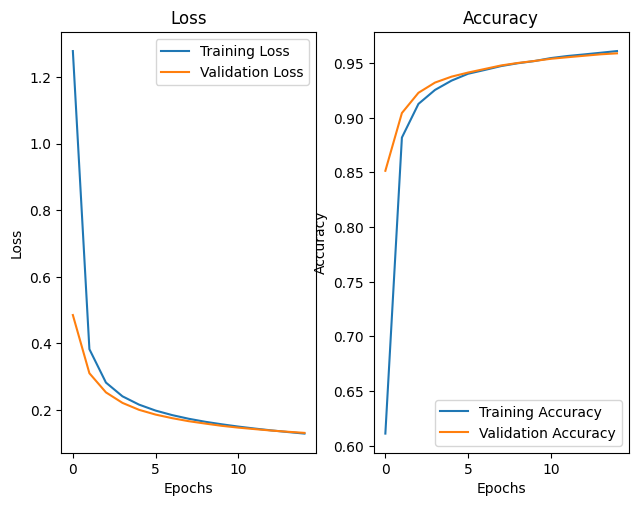

In [25]:
plot_performance(history3)

Analyzing the graphs, it can be observed that both curves are nearly perfect. Compared to the previous models, there is a complete absence of overfitting and underfitting. One noticeable feature in the *Loss graph* is that both curves stabilize around a value of about 0.2, which, while still relatively low, is higher compared to the previous models. A similar observation can be made for the *Accuracy graph*, which stabilizes at a very high value, though lower than in the previous models, around 0.95.

In [26]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.11965948343276978
Test accuracy 0.961899995803833


As just observed in the graphs, the *Test Loss* is higher compared to the previous cases, even exceeding 0.10. However, it is still a low value and therefore acceptable. The same applies to the *Test Accuracy*, which is very high (0.96), but in comparison to the previous models, it is the lowest value. Even so, this is still an acceptable result.

## Model 4 - Added fully connected layer

In this case, we decided to modify the structure of the network in model 2, which has so far yielded the best results in terms of Test Loss and Test Accuracy. A fully connected layer with 8 neurons was added, using the "relu" activation function.

In [41]:
input_shape = (28,28,1)

model_4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Conv2D(12, kernel_size=(5,5), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(23, kernel_size=(4,4), activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3)),
        
        layers.Flatten(),

        layers.Dense(8, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_4.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 24, 24, 12)     │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 12, 12, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 9, 9, 23)       │         4,439 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 3, 3, 23)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 207)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,505 (25.41 KB)

 Trainable params: 6,505 (25.41 KB)

 Non-trainable params: 0 (0.00 B)

By adding a fully connected layer with 8 neurons and a "relu" activation function, the number of parameters decreased by nearly 300 compared to Model 2. The model now has a total of 6505 parameters, all of which are trainable.

In [42]:
batch_size = 128
epochs = 15

model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history4 = model_4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4645 - loss: 1.4379 - val_accuracy: 0.9210 - val_loss: 0.2710
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9277 - loss: 0.2457 - val_accuracy: 0.9547 - val_loss: 0.1560
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9538 - loss: 0.1544 - val_accuracy: 0.9619 - val_loss: 0.1262
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9633 - loss: 0.1254 - val_accuracy: 0.9660 - val_loss: 0.1130
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9672 - loss: 0.1088 - val_accuracy: 0.9687 - val_loss: 0.1043
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9704 - loss: 0.0968 - val_accuracy: 0.9697 - val_loss: 0.0987
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9732 - loss: 0.0878 - val_accuracy: 0.9713 - val_loss: 0.0937
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9760 - loss: 0.0800 - val_accuracy

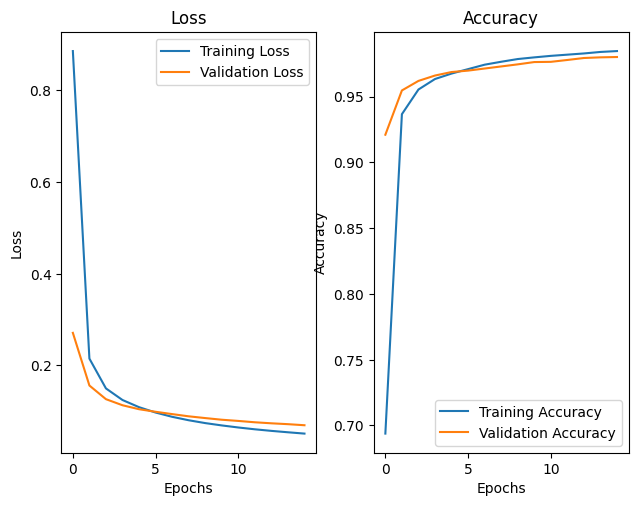

In [43]:
plot_performance(history4)

From the obtained graphs, it can be seen that the training loss decreases during the first epochs and then stabilizes around 0.1. A slight overfitting is observed around the fifteenth epoch; however, compared to Model 2, overfitting has decreased. A similar observation can be made for the accuracy graph, which increases in the early epochs and then stabilizes around 0.97. Again, there is a slight overfitting, but it is less pronounced than in Model 2.

In [44]:
score = model_4.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.05953829362988472
Test accuracy 0.9812999963760376


The model performs well, with a *Test Accuracy* above 0.98 and a low *Test Loss*, demonstrating good generalization capabilities. However, compared to Model 2, these results are slightly worse: the *Test Loss* increased by 0.02, while the *Test Accuracy* decreased by nearly 0.01. Even though the performance has slightly decreased, the model is still acceptable.

## Model 5 - Changeed MaxPolling to AveragePooling

In this model, further modifications were made to Model 2, which has delivered the best results so far, in an attempt to enhance its performance. Specifically, MaxPooling was replaced with AveragePooling, while keeping the pool_size dimensions at 2x2 and 3x3.

In [51]:
input_shape = (28,28,1)

model_5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Conv2D(12, kernel_size=(5,5), activation='relu'),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Conv2D(23, kernel_size=(4,4), activation='relu'),
        layers.AveragePooling2D(pool_size=(3,3)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_5.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 24, 24, 12)     │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 12, 12, 12)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 9, 9, 23)       │         4,439 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 3, 3, 23)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 207)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,831 (26.68 KB)

 Trainable params: 6,831 (26.68 KB)

 Non-trainable params: 0 (0.00 B)

With this structure, the model has a total of 6831 parameters, all trainable.

In [52]:
batch_size = 128
epochs = 15

model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history5 = model_5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6360 - loss: 1.1941 - val_accuracy: 0.9450 - val_loss: 0.1969
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9436 - loss: 0.1947 - val_accuracy: 0.9624 - val_loss: 0.1299
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9603 - loss: 0.1350 - val_accuracy: 0.9686 - val_loss: 0.1061
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9670 - loss: 0.1107 - val_accuracy: 0.9731 - val_loss: 0.0935
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9709 - loss: 0.0967 - val_accuracy: 0.9757 - val_loss: 0.0856
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9736 - loss: 0.0869 - val_accuracy: 0.9770 - val_loss: 0.0801
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9757 - loss: 0.0796 - val_accuracy: 0.9778 - val_loss: 0.0756
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9771 - loss: 0.0738 - val_accurac

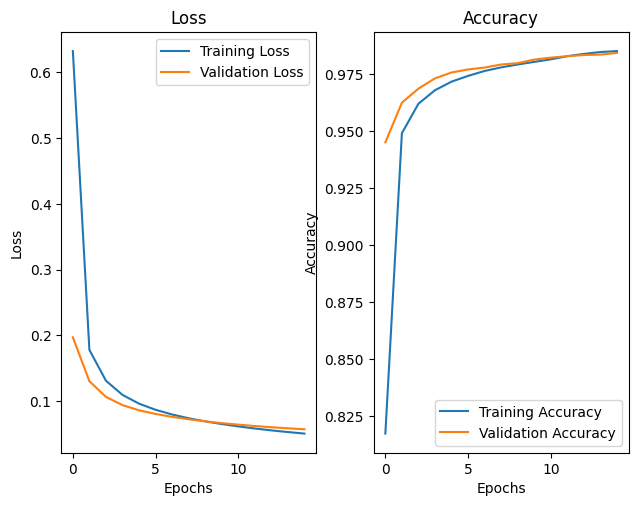

In [53]:
plot_performance(history5)

The results obtained from the graphs are very good: in the *Loss graph*, the curves stabilize just below 0.1, with a slight overfitting occurring around the fifteenth epoch. In the *Accuracy graph*, the curves stabilize around 0.98, with the training and validation curves overlapping in the final epochs. Compared to Model 2, the results are improved, especially in terms of Accuracy, which no longer shows any signs of overfitting.

In [54]:
score = model_5.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.044315870851278305
Test accuracy 0.9860000014305115


Even when using AveragePooling instead of MaxPooling, the results obtained are very similar between the two models. However, Model 2 still performs slightly better, as its *Test Loss* was 0.03, while the latest model gives a value of 0.04. Regarding accuracy, the results are nearly identical, with a difference of only 0.003, which is negligible.

## Conclusion

In this assignment, we started with a **basic model** consisting of a very simple structure with just one pooling layer. This model yielded relatively inefficient results, as observed through the graphs and performance metrics. The structure was then modified by adding a convolutional layer, which immediately produced good results, achieving an accuracy of 0.98 and a loss of 0.05. After that, starting from this model, we attempted to improve it further by adding a second convolutional layer. The results improved slightly, but the graphs showed increased overfitting towards the later epochs.

We continued with another attempt by increasing the number of convolutional layers to three. In this case, the performance worsened compared to the model with two convolutional layers, but the graphs showed a reduction in overfitting.

At this point, we found that the model with two convolutional layers yielded the best performance. Therefore, we decided to make changes to its structure to see if it could be further improved. The first modification was the addition of a fully connected layer with 8 neurons. While the results remained excellent, they were not better than the model without this addition.

The second modification involved using AveragePooling instead of MaxPooling. This resulted in similar, if slightly lower, performance, but the graphs improved significantly. In particular, the loss graph shows a slight overfitting towards the fifteenth epoch, while the accuracy graph does not exhibit any overfitting or underfitting.

Based on this observation and considering that the performance results were nearly identical, we can conclude that **Model 5** is the one that provided the best results.